# Import Libraries

In [1]:
import copy
import utils
import torch
import constants
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from env import Env
from agent import Agent
from torchsummary import summary
from torch.distributions import Normal, Categorical

[MAX_POSSIBLE_DIST]: 0.4428093360578569


# Initialise Environment

In [2]:
#initialise environment
min_x, max_x =  -0.110 - 0.150,   -0.110 + 0.150
min_y, max_y =   0.560 - 0.125,    0.560 + 0.125
min_z, max_z =               0,              0.4 

workspace_lim = np.asarray([[min_x, max_x], 
                            [min_y, max_y],
                            [min_z, max_z]])

print(f"workspace space: \n{workspace_lim}")

obj_dir = 'objects/blocks/'
N_obj   = 5

env = Env(obj_dir, N_obj, workspace_lim, cluttered_mode= False, is_debug = False)

workspace space: 
[[-0.26   0.04 ]
 [ 0.435  0.685]
 [ 0.     0.4  ]]


# Initialise Agent

In [3]:
agent = Agent(env, 
              max_memory_size = 25000, 
              max_memory_size_rl = 1,
              max_memory_size_hld = 25000,
              is_debug = False, 
              N_batch = 512, 
              N_batch_hld = 512, 
              lr = 1e-4, 
              hld_lr = 1e-3,
              tau = 0.01,
              tau_hld = 0.01,
              max_action_taken = 50,
              max_result_window = 500,
              max_result_window_hld = 250,
              max_result_window_eval = 100,
              max_stage1_episode = 200,
              save_all_exp_interval = 100)

device: cuda
[SUCCESS] initialise environment
[SUCCESS] initialise networks


# Interact

In [4]:
# agent.interact(max_episode = 3000, 
#                hld_mode    = constants.HLD_MODE,
#                is_eval     = False)

In [9]:
agent.is_eval = False
agent.load_agent_data()

Text(0, 0.5, 'Completion Rate (%)')

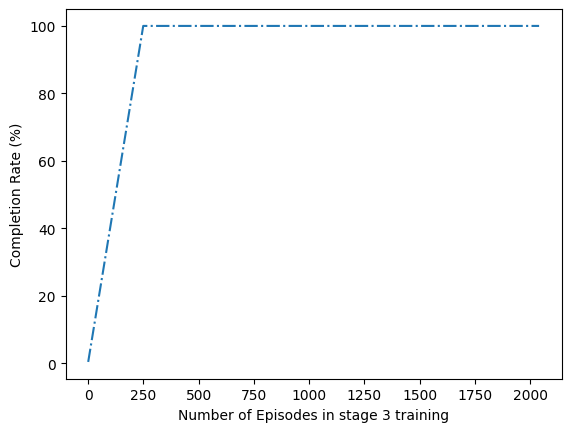

In [10]:
plt.plot(np.array(agent.CR_train)*100., '-.')

plt.xlabel('Number of Episodes in stage 3 training')
plt.ylabel('Completion Rate (%)')

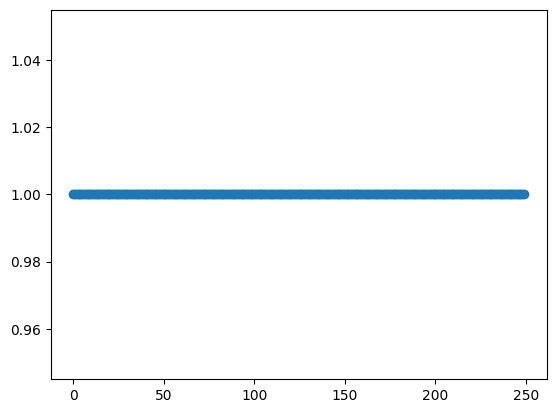

In [11]:
plt.plot(np.array(agent.complete_record_train), 'o')

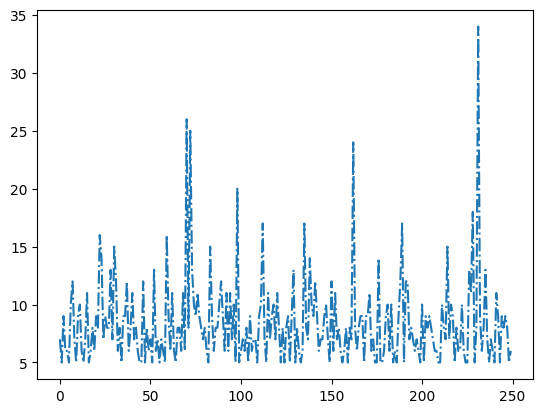

In [12]:
plt.plot(agent.action_taken_record_train, '-.')

Text(0, 0.5, 'Moving Average of Actions Taken for Completion')

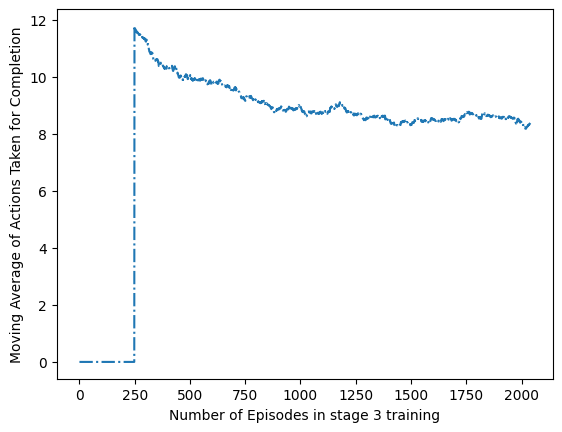

In [13]:
plt.plot(agent.ATC_train, '-.')
plt.xlabel('Number of Episodes in stage 3 training')
plt.ylabel('Moving Average of Actions Taken for Completion')

0.982


Text(0, 0.5, 'Moving Average Success rate (%)')

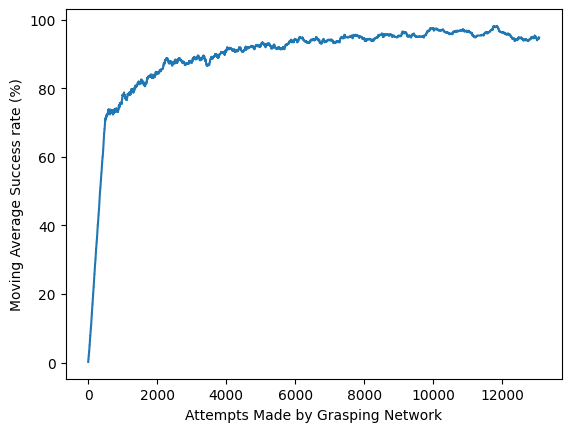

In [14]:
plt.plot(np.array(agent.grasp_success_rate_hist)*100.)
print(np.array(agent.grasp_success_rate_hist).max())
plt.xlabel('Attempts Made by Grasping Network')
plt.ylabel('Moving Average Success rate (%)')

0.882


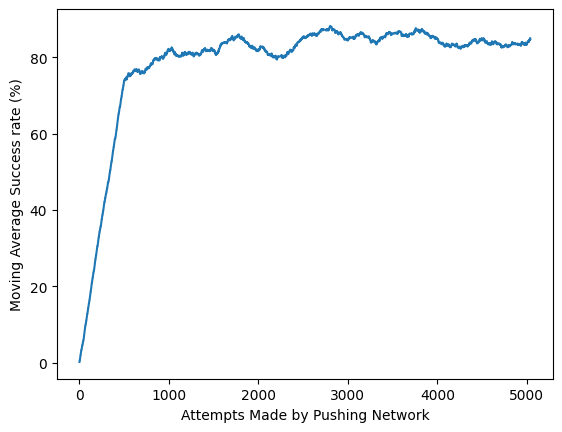

In [15]:
plt.plot(np.array(agent.push_success_rate_hist)*100)
plt.xlabel('Attempts Made by Pushing Network')
plt.ylabel('Moving Average Success rate (%)')
print(np.array(agent.push_success_rate_hist).max())

In [12]:
# print(agent.bc_lambda)      

# print(agent.grasp_reward_list)      
# print(agent.push_reward_list)    
# print(agent.hld_record_list)   

# print(agent.grasp_record_index)      
# print(agent.push_record_index)       
# print(agent.hld_record_index)    

# print(agent.best_grasp_reward_sum) 
# print(agent.best_push_reward_sum)  
# print(agent.best_hld_success_rate)

# print(agent.grasp_reward_sum_hist) 
# print(agent.push_reward_sum_hist)  
# print(agent.hld_success_rate_hist)